In [1]:
import numpy as np
from pymab.policies.thompson_sampling import ThompsonSamplingPolicy
from pymab.policies.greedy import GreedyPolicy
from pymab.game import Game

In [2]:
n_bandits = 3
reward_distribution = 'gaussian'

thomson_sampling = ThompsonSamplingPolicy(n_bandits=n_bandits, reward_distribution=reward_distribution)
greedy = GreedyPolicy(optimistic_initilization=1,
                      n_bandits=n_bandits, reward_distribution=reward_distribution)

# Define Q-values, which are the true values of the bandits
#Q_values = np.array([0.1, 0.5, -0.2, 0.4, 0.7, 0.45, 0.3, 0.2, 0.05, -0.1])
Q_values = [-0.3, 0.7, 0.1]

In [3]:
# Setup the game
game = Game(n_episodes=100, 
            n_steps=1000, 
            policies=[
                    greedy,
                    thomson_sampling
                ], 
            n_bandits=n_bandits,
            Q_values=Q_values,
            is_stationary=False
            )

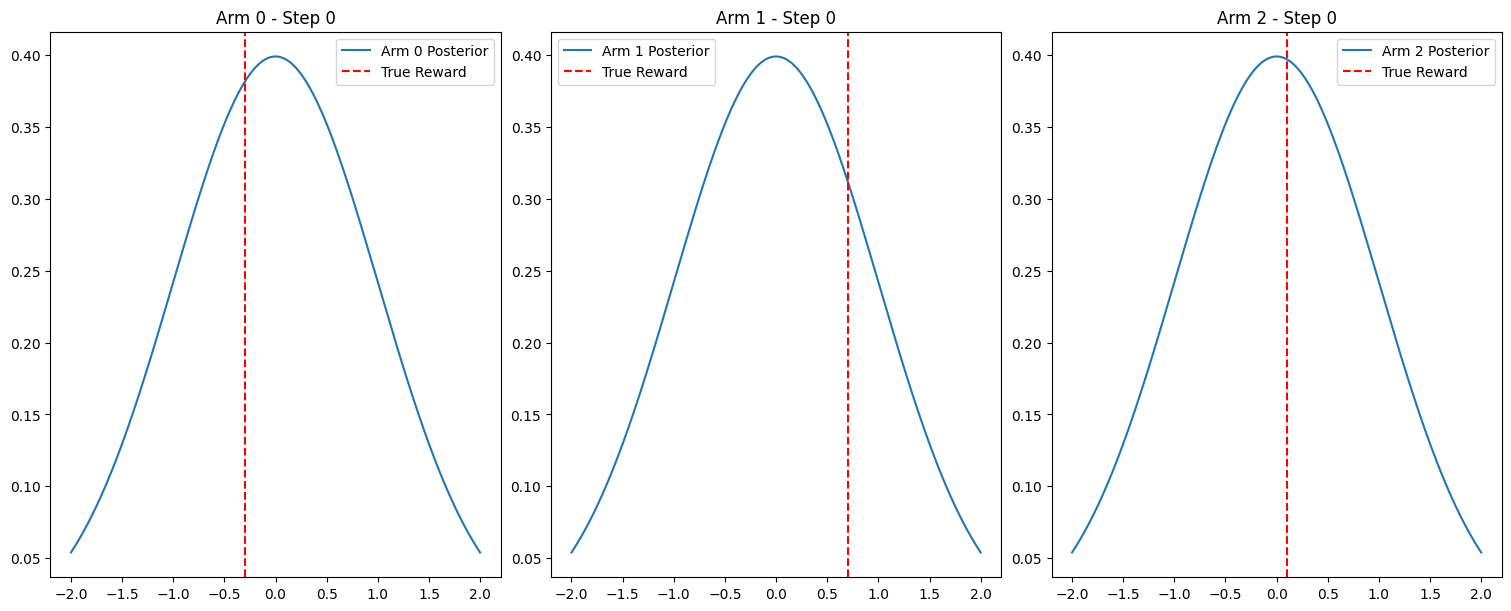

In [4]:
for policy in game.policies:
    policy.Q_values = game.Q_values
thomson_sampling.plot_distribution()

In [5]:
# Run the game
game.game_loop()

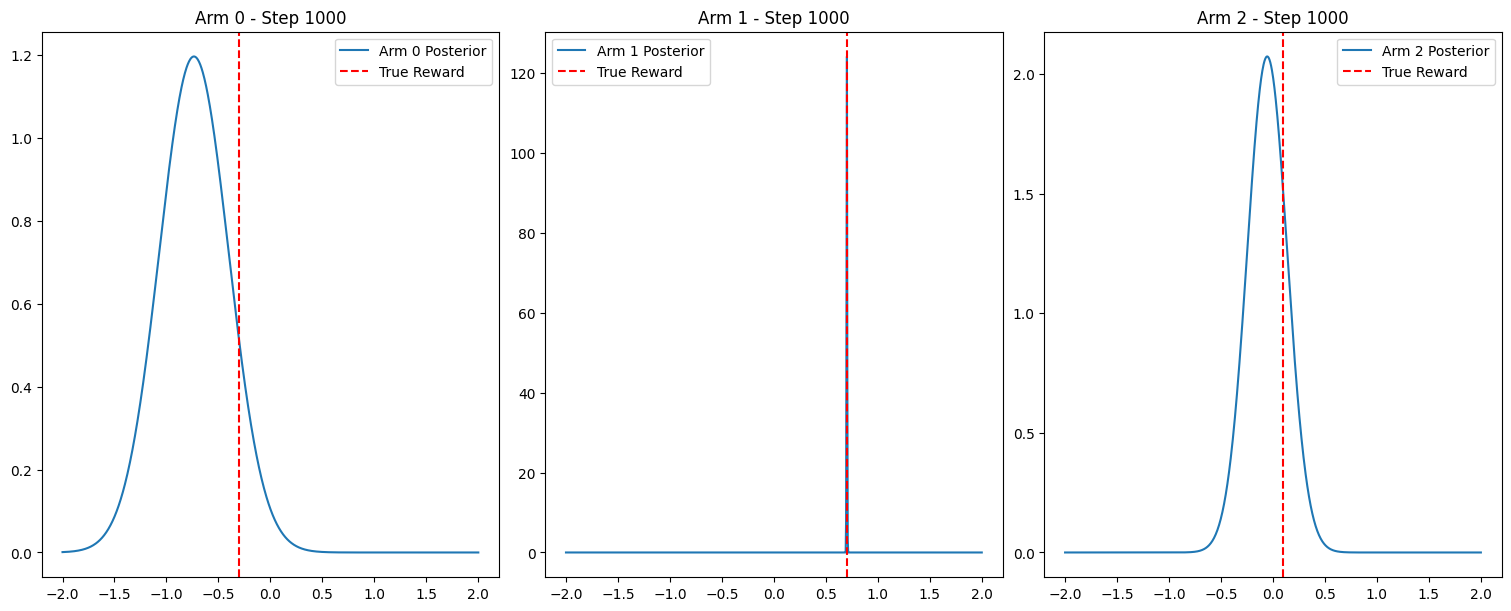

In [6]:
thomson_sampling.plot_distribution()

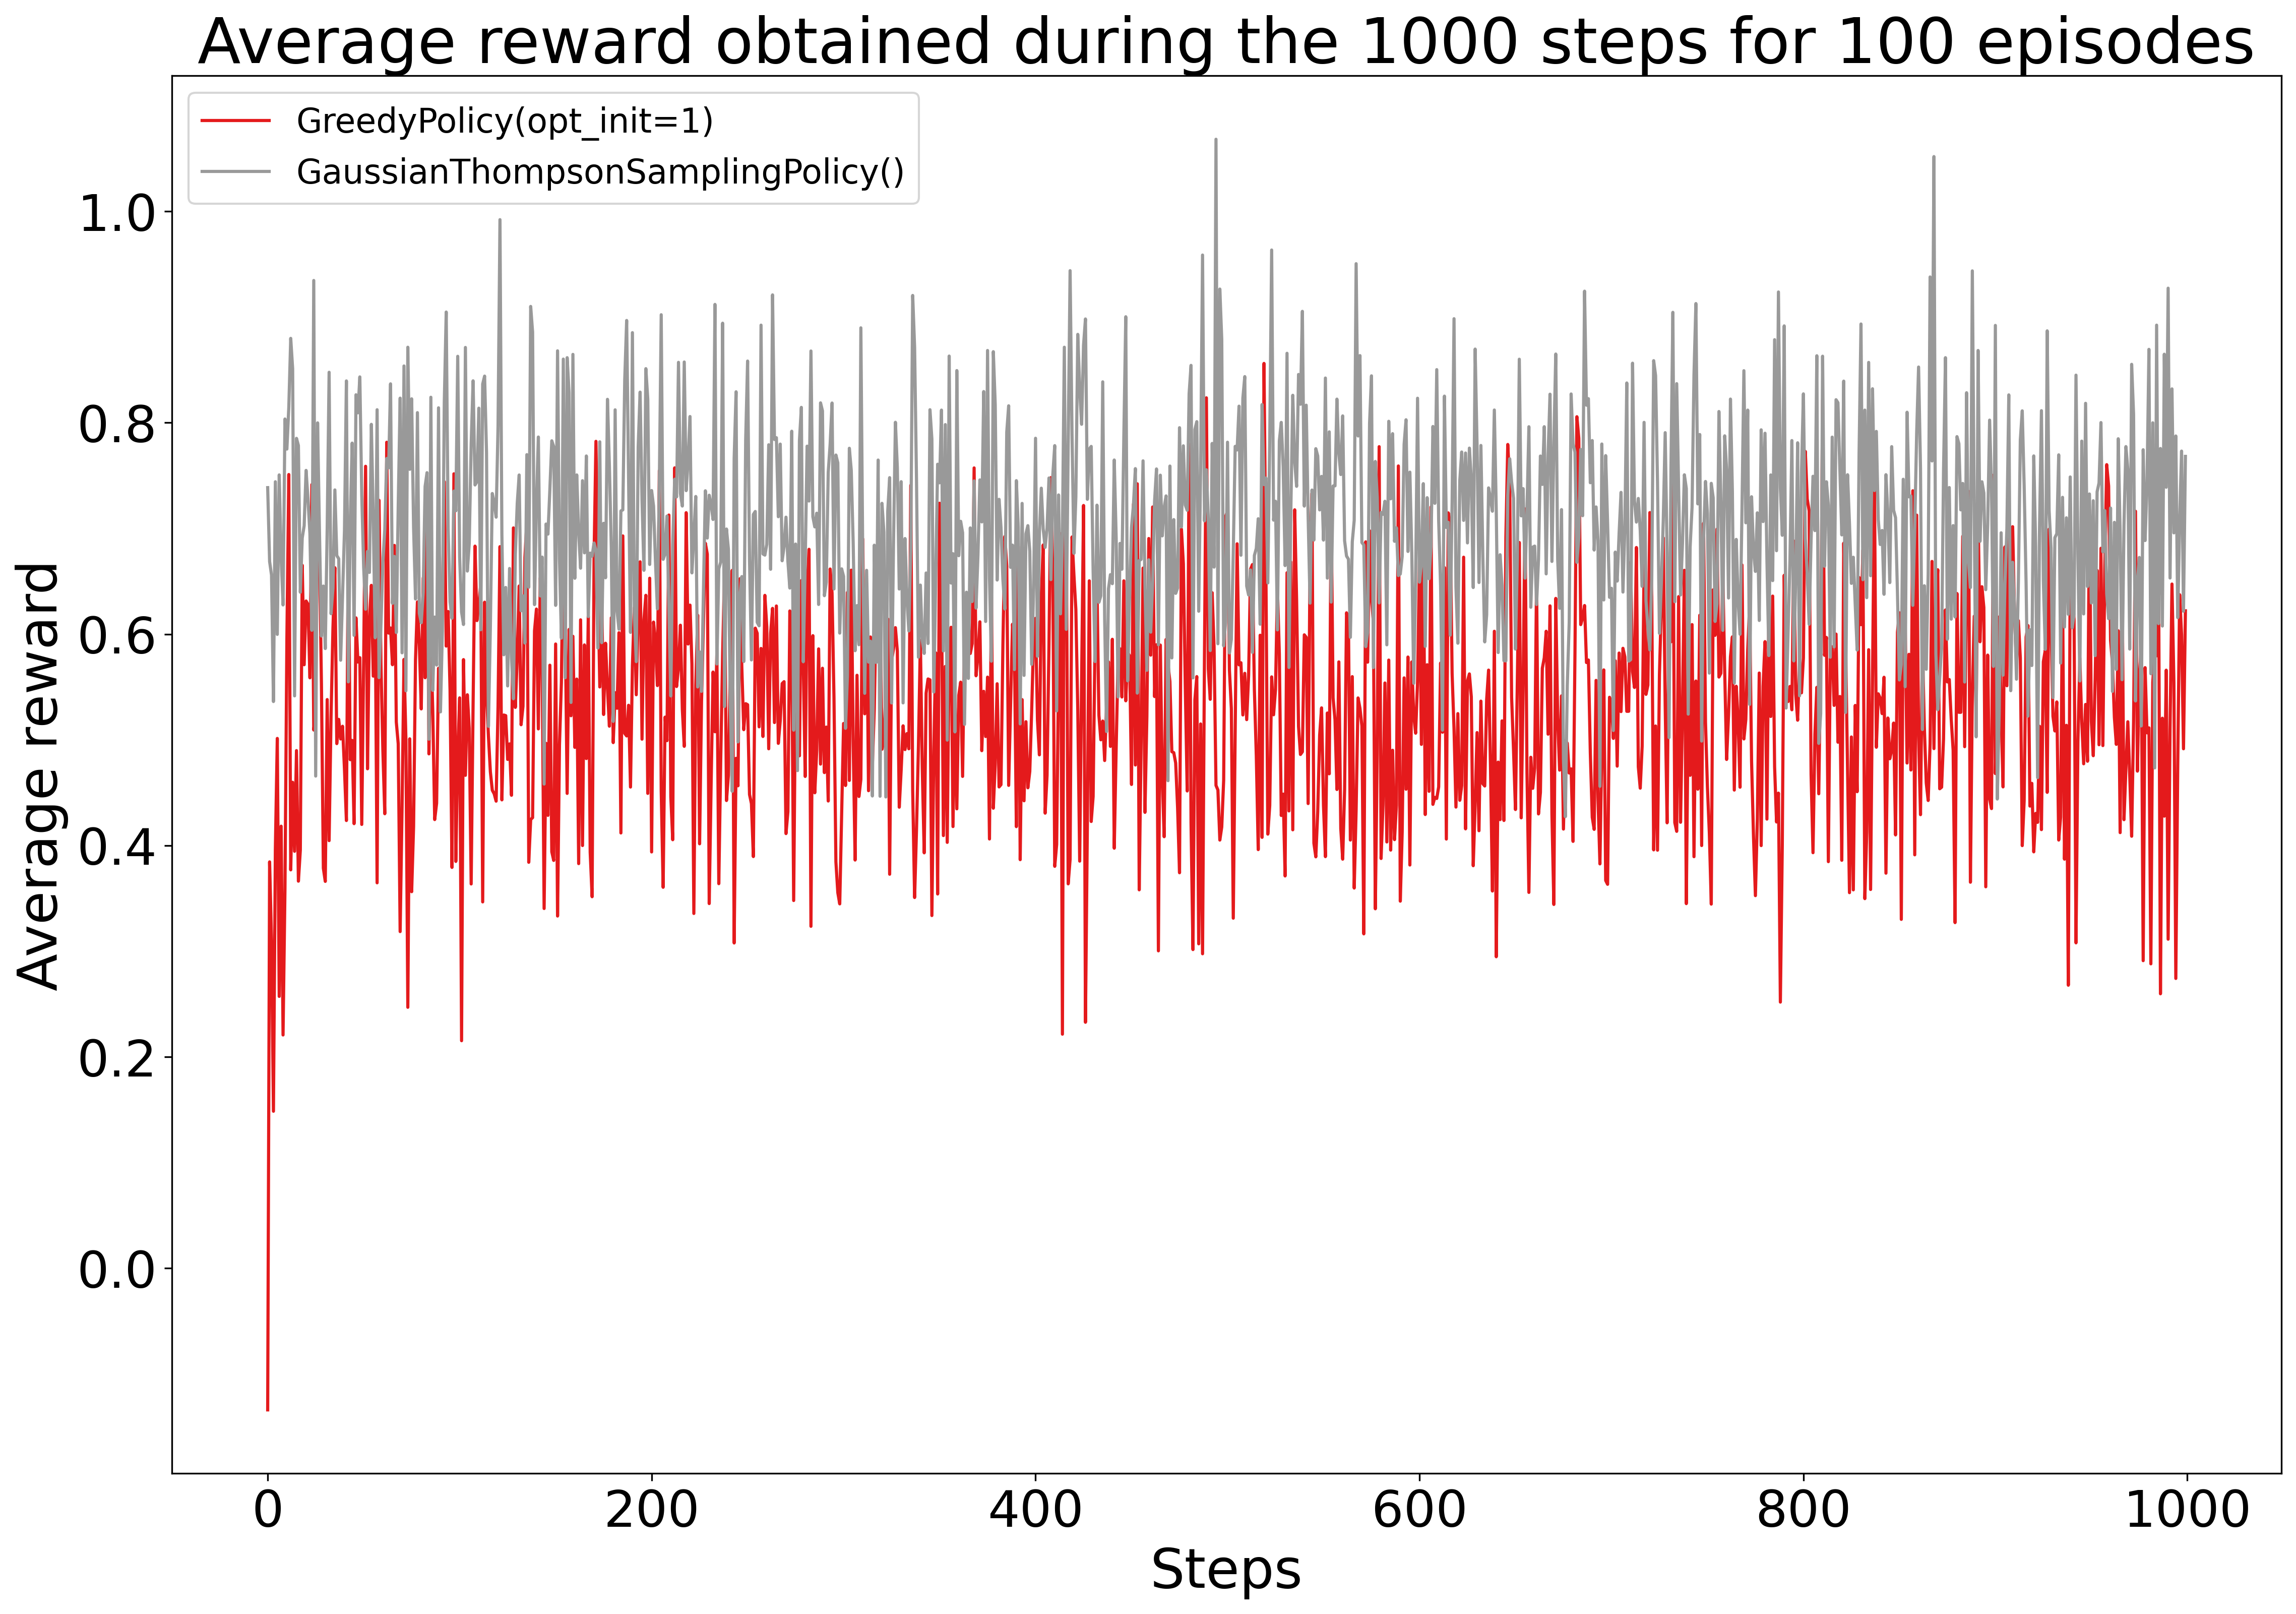

In [7]:
# Plot the results
game.plot_average_reward_by_step()

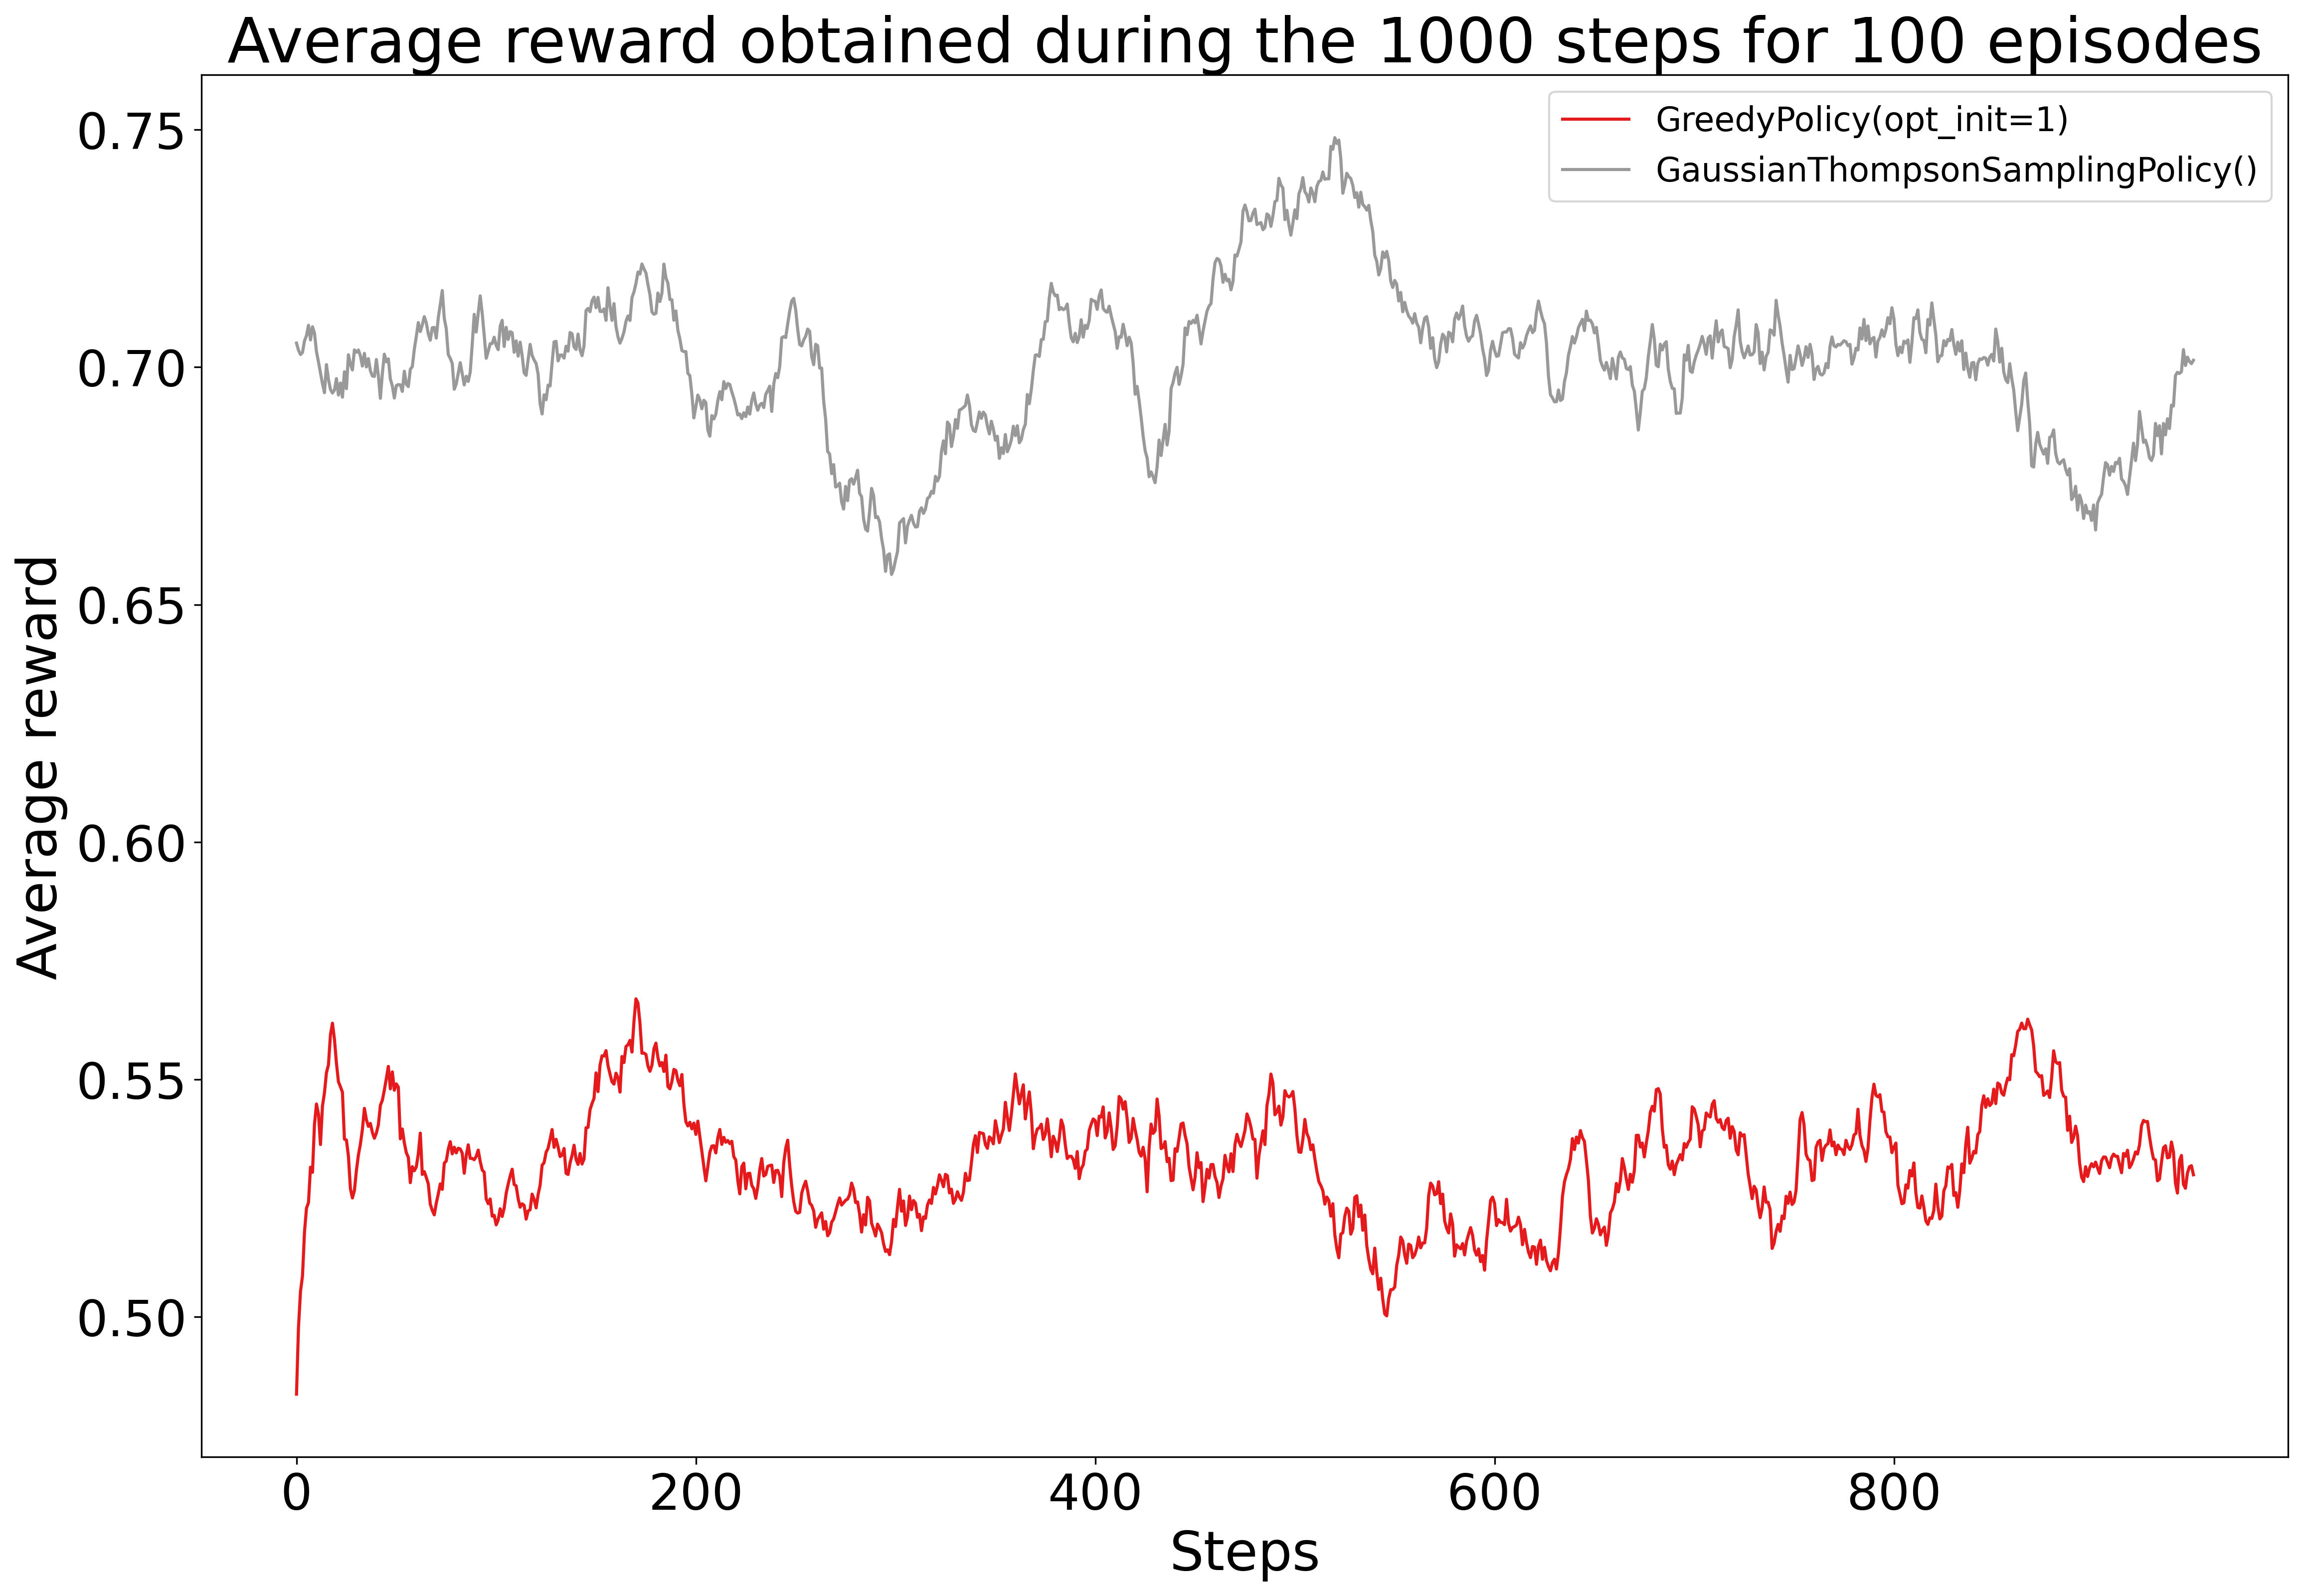

In [8]:
game.plot_average_reward_by_step_smoothed()

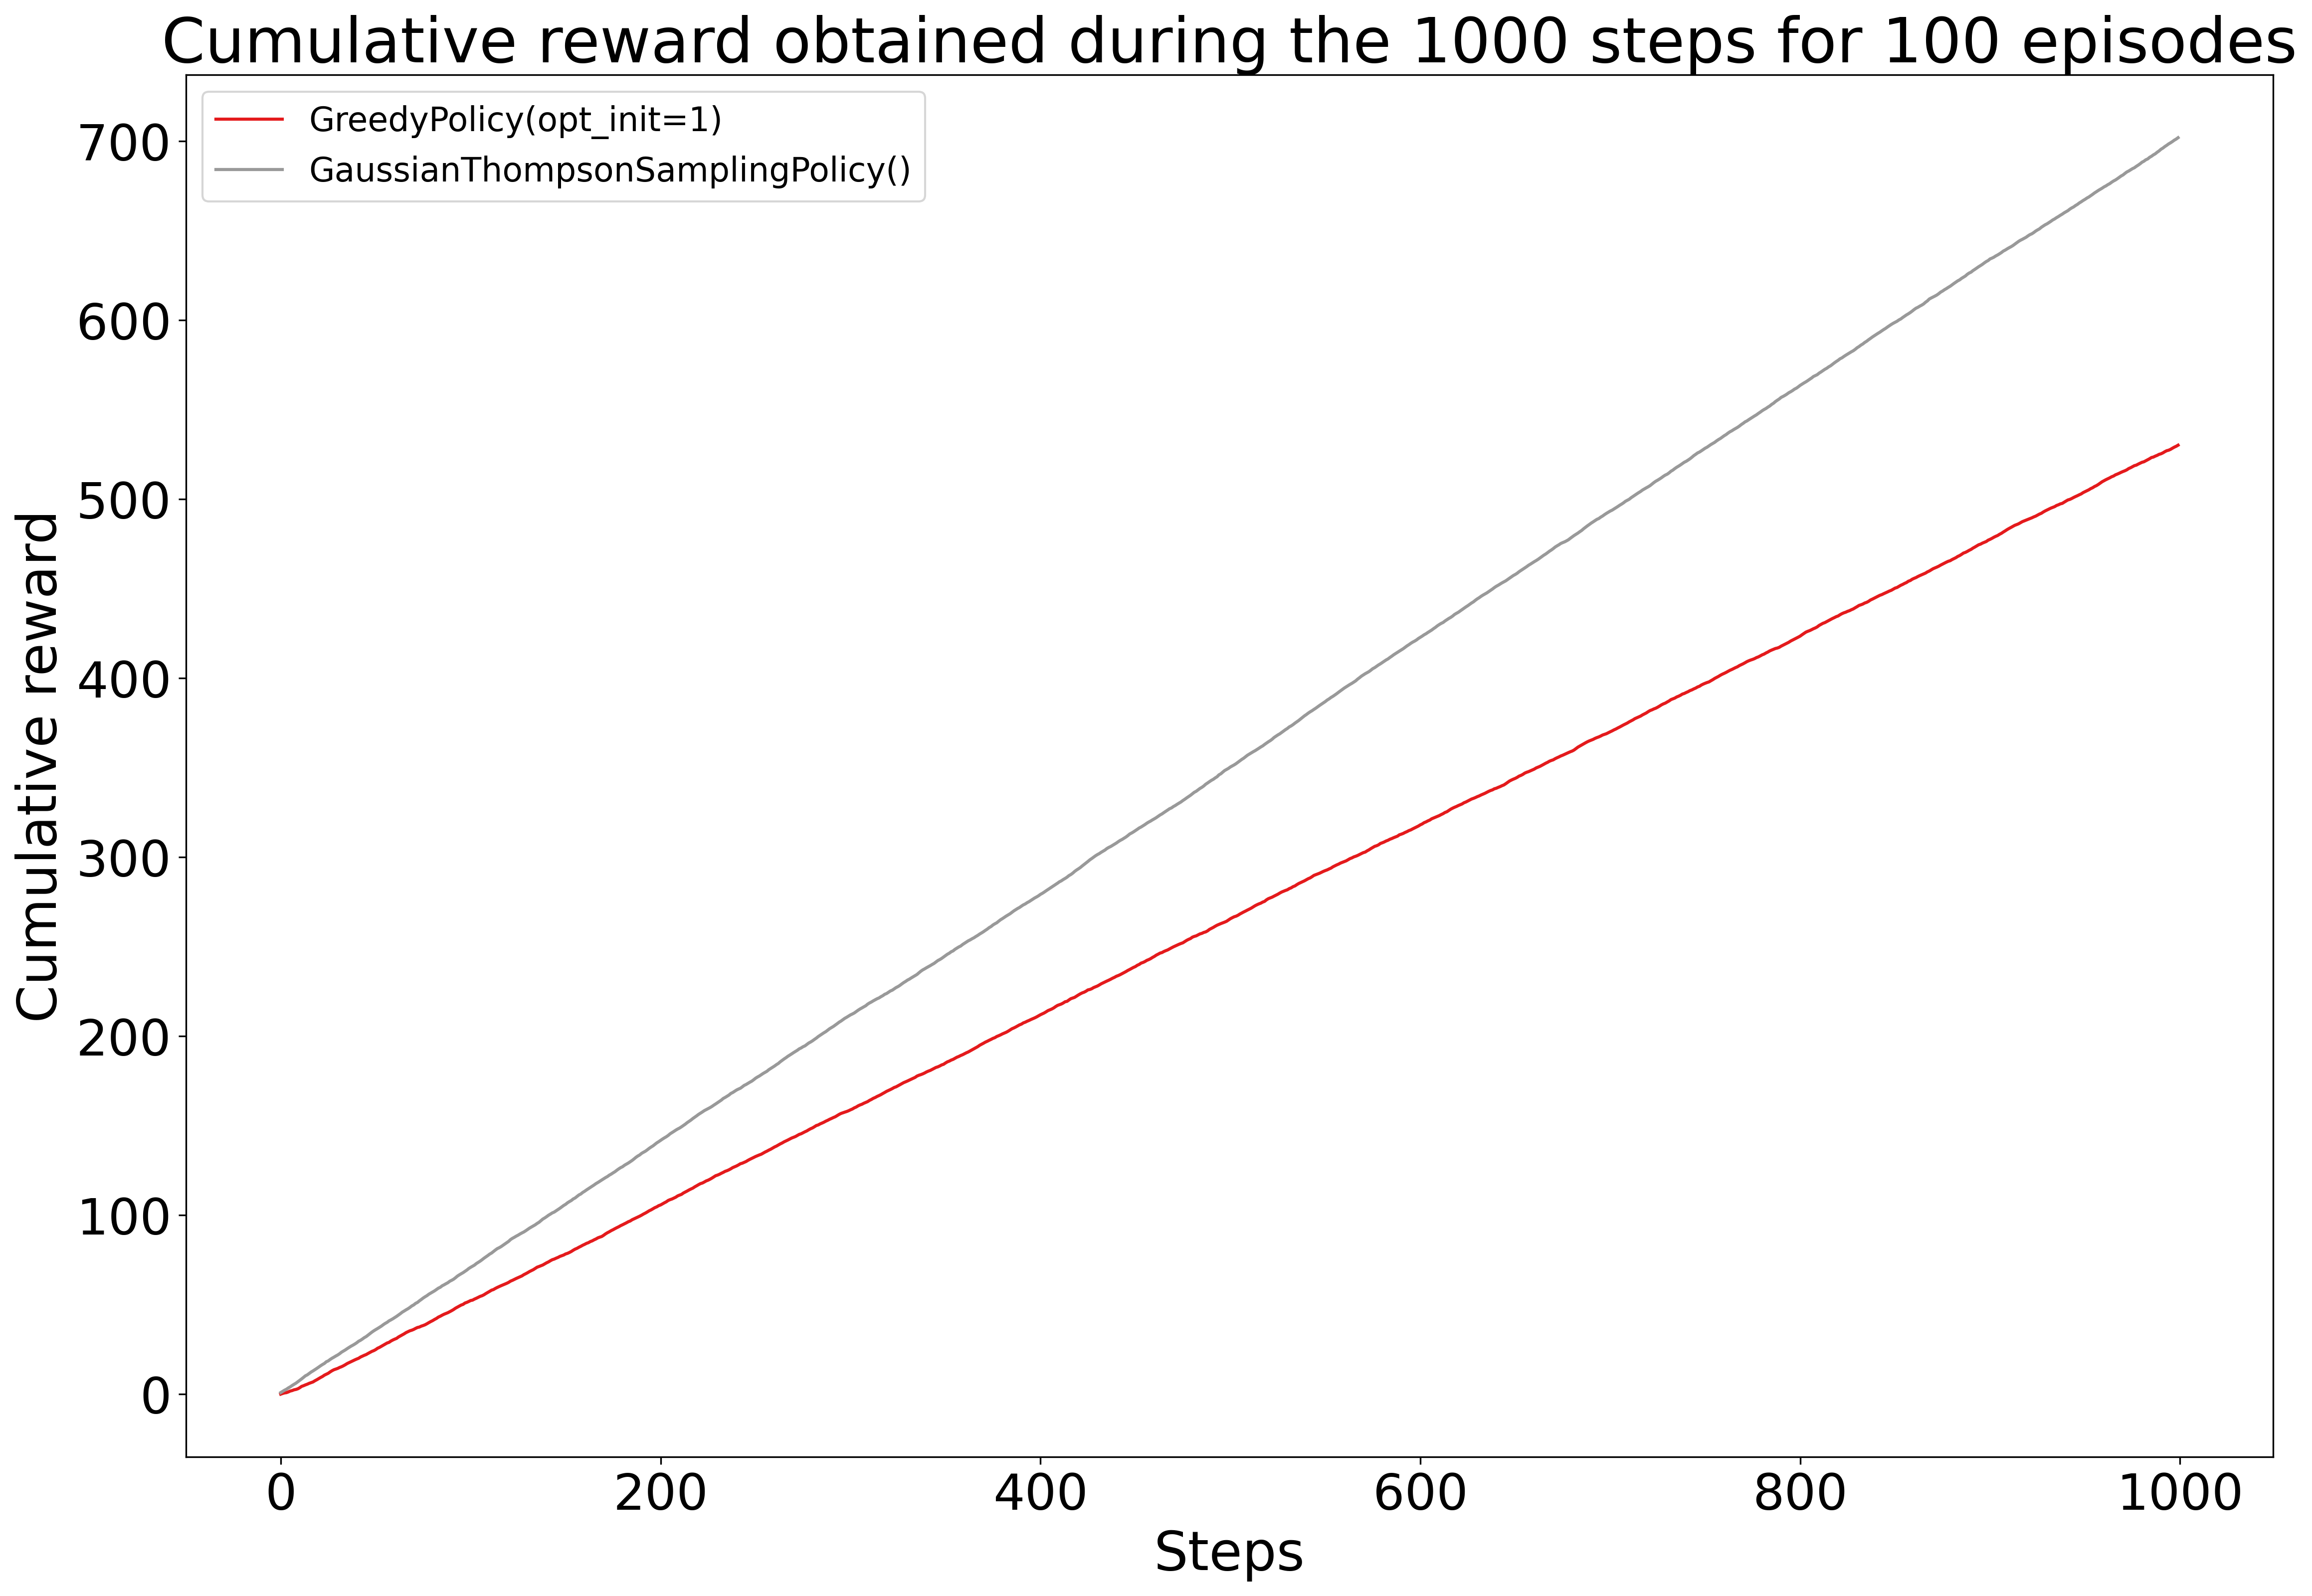

In [9]:
game.plot_total_reward_by_step()

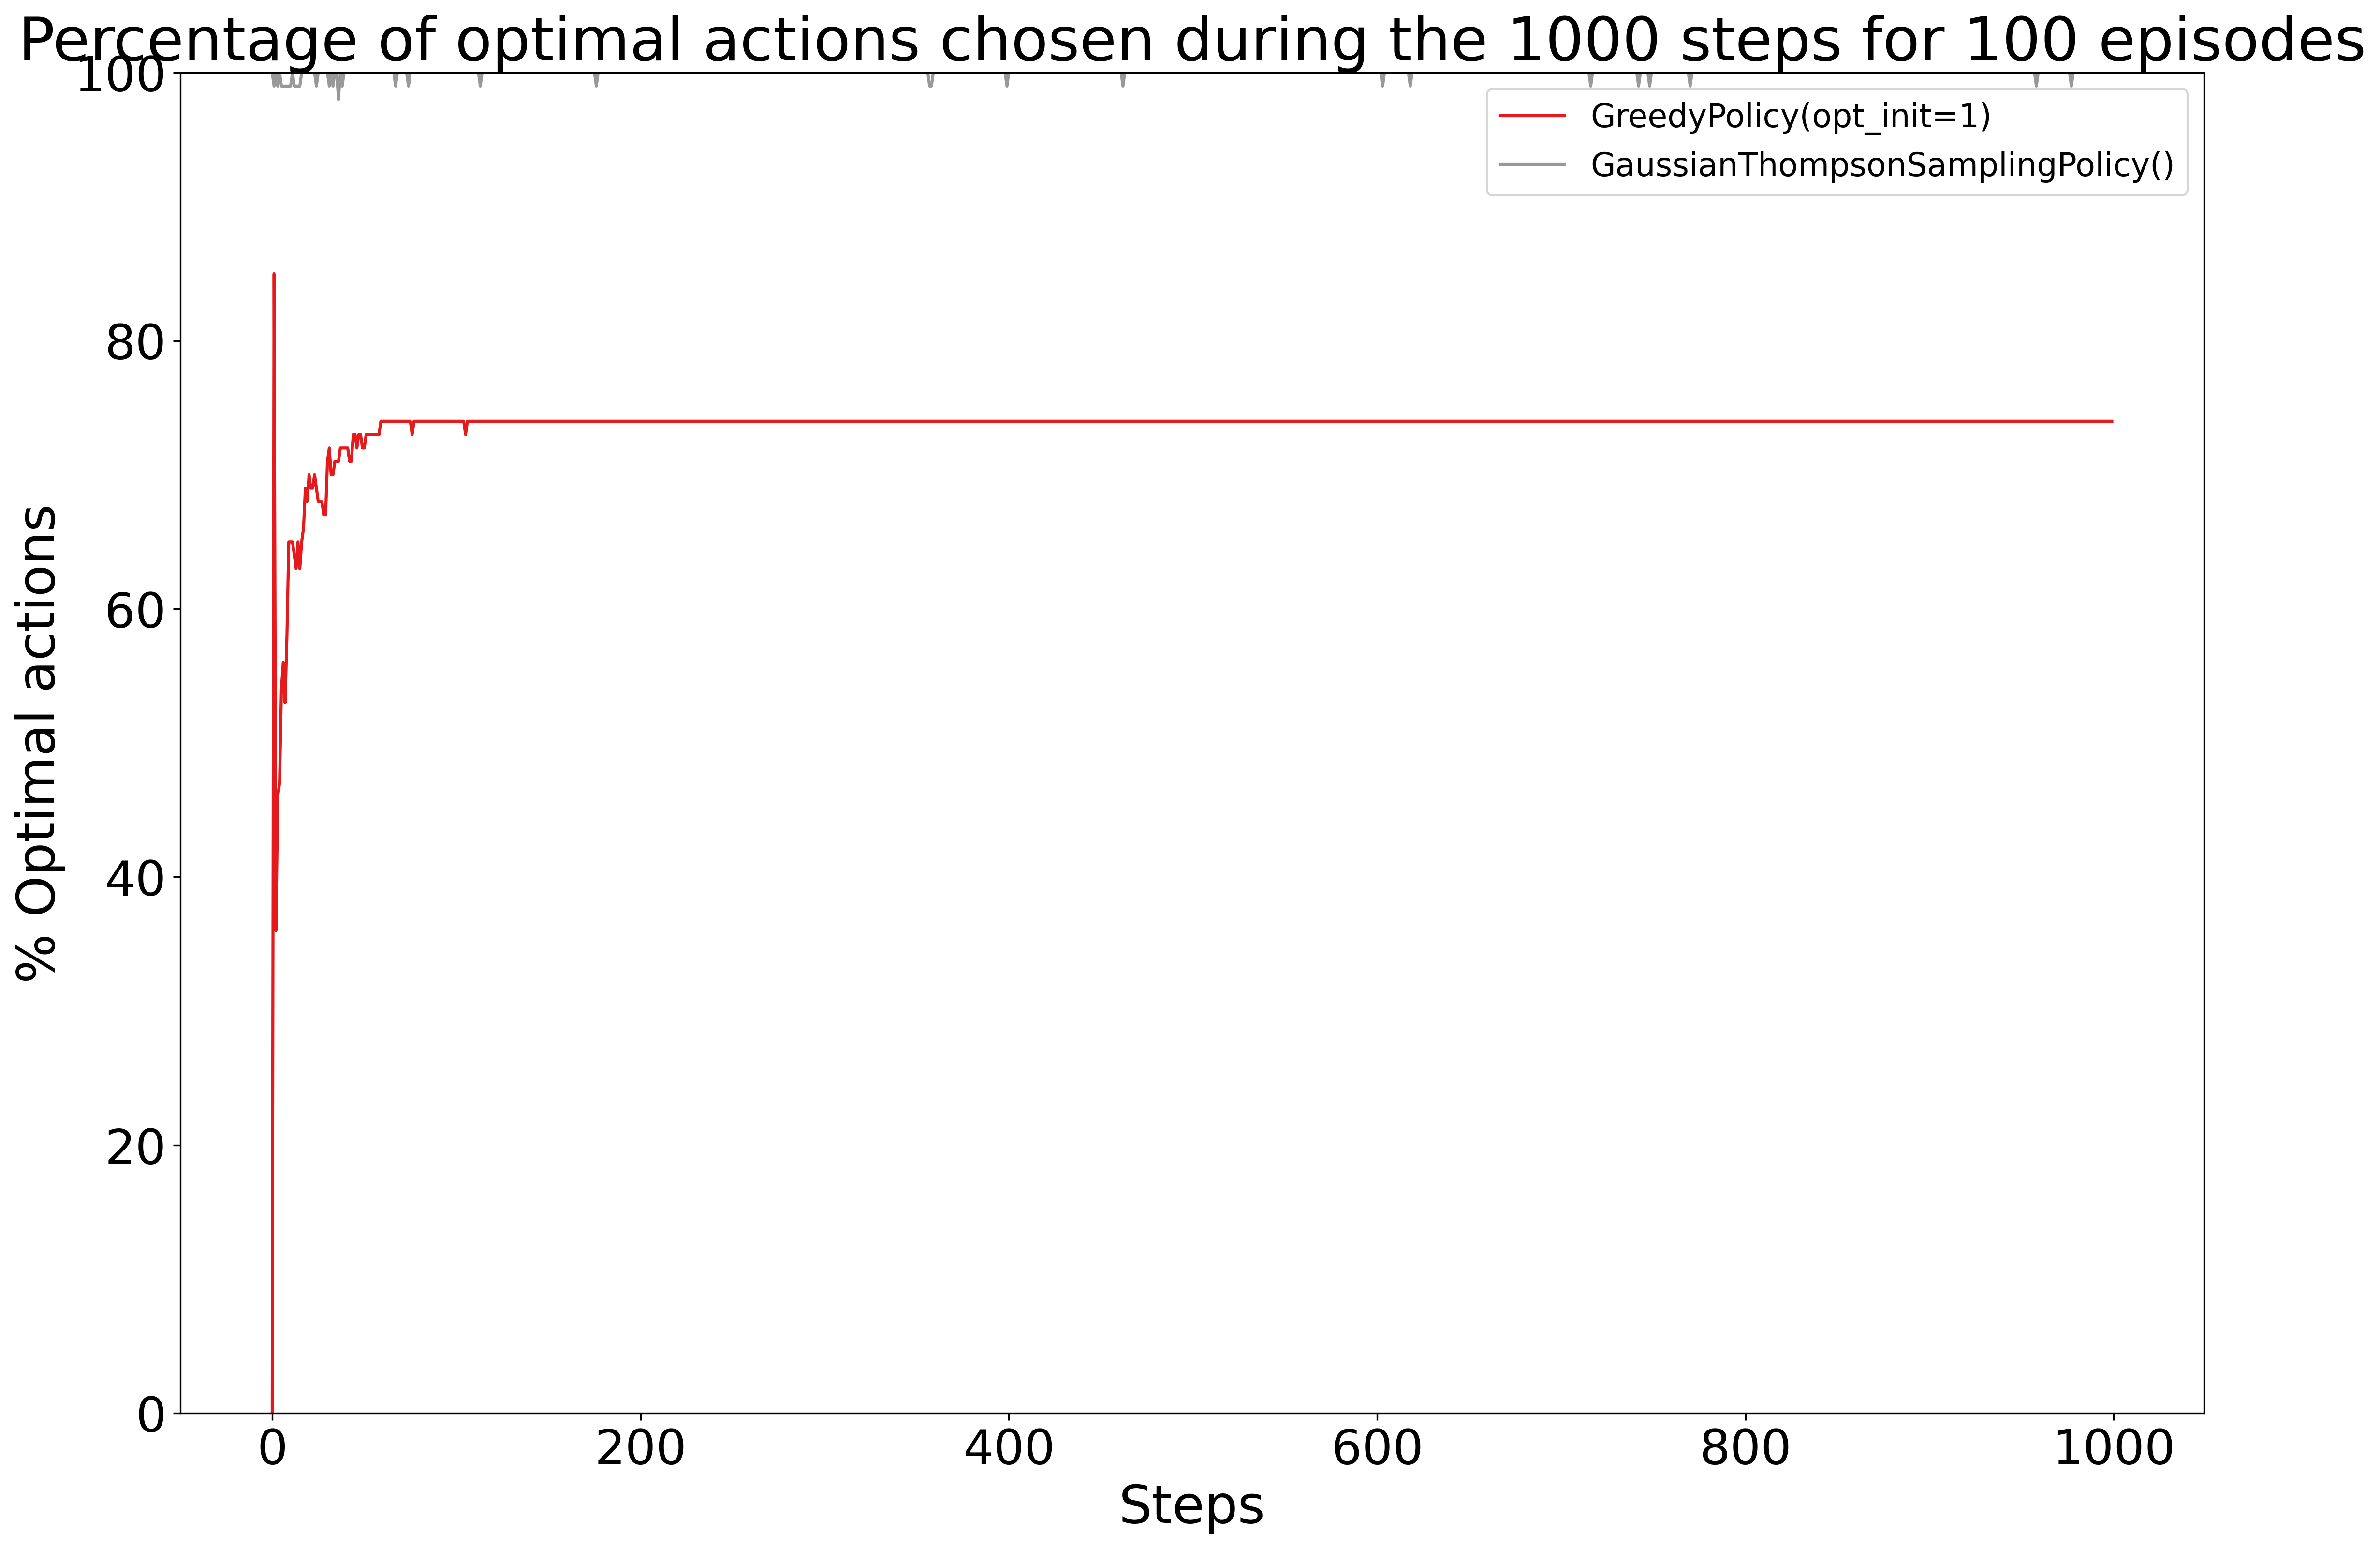

In [10]:
game.plot_rate_optimal_actions_by_step()